In [1]:
import json
import os

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

In [3]:
thresholds = np.arange(0.4, 1, 0.05)

In [4]:
all_results = json.load(
    open(os.path.join("..", "data", "results", "thresholds.json"), "r")
)

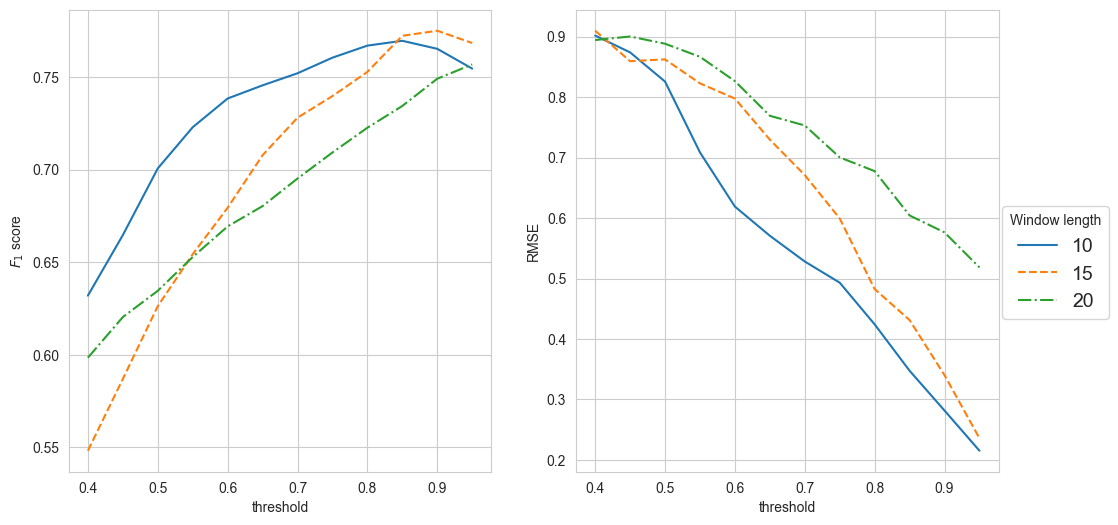

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

linestyles = ["-", "--", "-."]

for idx, (window_length, results) in enumerate(all_results.items()):
    ax[0].plot(
        thresholds, results["f1"], label=window_length, linestyle=linestyles[idx]
    )
    ax[1].plot(
        thresholds, results["rmse"], label=window_length, linestyle=linestyles[idx]
    )

# ax[0].set_title("Averaged F1-score")
ax[0].set_xlabel("threshold")
ax[0].set_ylabel("$F_1$ score")
ax[0].legend().set_visible(False)

# ax[1].set_title("Averaged RMSE")
ax[1].set_xlabel("threshold")
ax[1].set_ylabel("RMSE")
ax[1].legend().set_visible(False)

# common legend
handles, labels = ax[1].get_legend_handles_labels()

fig.legend(
    handles, labels, loc="center right", fontsize=14, title="Window length"
)  # , bbox_to_anchor=(1, 1))
plt.savefig(os.path.join("..", "figures", "thresholds.pdf"))
plt.show()